# Demo 4: Plotting 

In [1]:
%matplotlib inline

# Import OceanSpy
import oceanspy as ospy

# Additional packages
import matplotlib.pyplot as plt
import numpy             as np

# Import the OceanDataset
od = ospy.open_oceandataset.get_started()

# For this notebook we will use daily fields
od = od.subsample.cutout(timeFreq='1D')

Opening [Getting Started with OceanSpy]:
[A small cutout from EGshelfIIseas2km_ASR.].


/home/idies/miniconda3/lib/python3.7/site-packages/dask/array/blockwise.py:204: UserWarning: The da.atop function has moved to da.blockwise
  warnings.warn("The da.atop function has moved to da.blockwise")


Cutting out the oceandataset.


/home/idies/workspace/Storage/malmans2/persistent/ESIP/oceanspy/oceanspy/subsample.py:1124: UserWarning: 
Time resampling drops variables on `time_midp` dimension.
Dropped variables: ['time_midp'].
  return cutout(self._od, **kwargs)


## TS-diagram

Cutting out the oceandataset.
Computing weighted averages.
Isopycnals: Computing potential density anomaly using the following parameters: {'eq_state': 'jmd95'}.


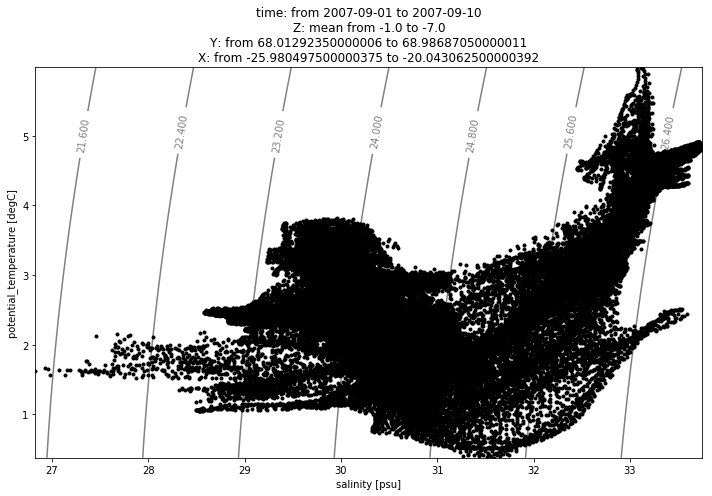

In [2]:
# Subsample for TS
odTS = od.subsample.cutout(XRange=[-26, -20], 
                           YRange=[68, 69], 
                           ZRange=[0, -10])

# TS diagram
fig = plt.figure(figsize=(10, 7))
ax  = odTS.plot.TS_diagram(meanAxes=['Z'])

Computing weighted averages.
Computing potential density anomaly using the following parameters: {'eq_state': 'jmd95'}.
Computing weighted averages.
Isopycnals: Computing potential density anomaly using the following parameters: {'eq_state': 'jmd95'}.


/home/idies/miniconda3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in greater
  return func(*args2)
/home/idies/miniconda3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less
  return func(*args2)


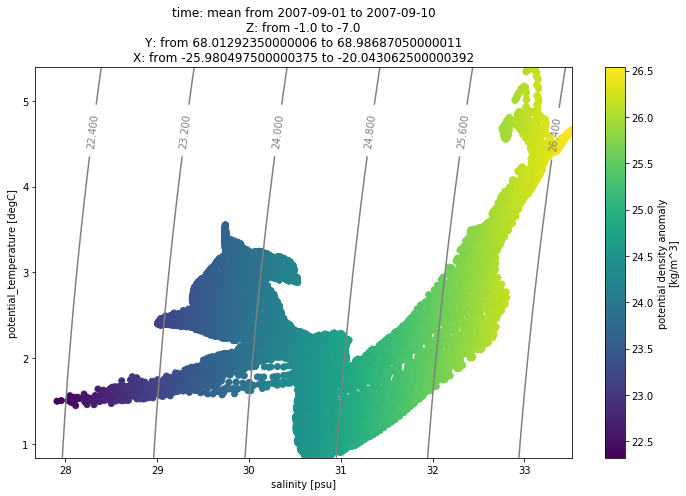

In [3]:
# There are several options!
fig = plt.figure(figsize=(10, 7))
ax  = odTS.plot.TS_diagram(colorName='Sigma0', meanAxes=['time'])

Computing weighted averages.
Computing weighted averages.
Interpolating [U] along [X]-axis.


/home/idies/miniconda3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)


Isopycnals: Computing potential density anomaly using the following parameters: {'eq_state': 'jmd95'}.


/home/idies/miniconda3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)
/home/idies/miniconda3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/home/idies/miniconda3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in greater
  return func(*args2)


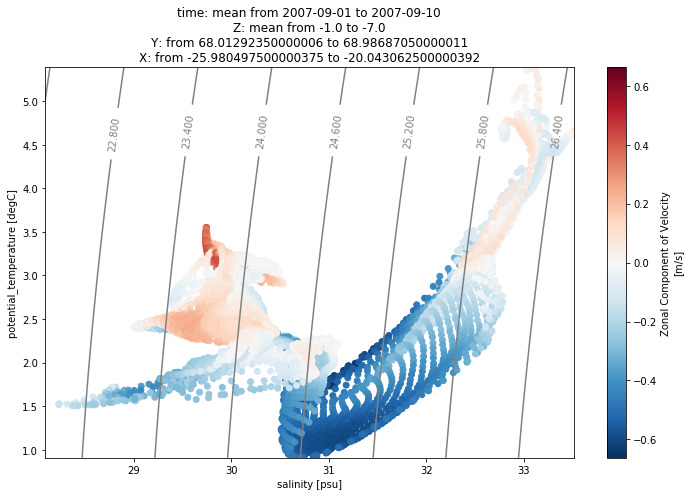

In [4]:
# Automatic regridding if needed
fig = plt.figure(figsize=(10, 7))
ax  = odTS.plot.TS_diagram(colorName='U', meanAxes=['time', 'Z'])

In [ ]:
# To animate, just use the same command but from .animate
fig  = plt.figure(figsize=(10, 7))
anim = odTS.animate.TS_diagram()
plt.close()

## Vertical Sections

In [ ]:
# Survey
lats_Kogur = [ 68.68,  67.52,  66.49]
lons_Kogur = [-26.28, -23.77, -22.99]

# Interpolate and add orthogonal velocities and density
od_surv = od.subsample.survey_stations(Xsurv=lons_Kogur, Ysurv=lats_Kogur, delta=2, 
                                       varList=['U', 'V', 'Temp', 'S'])
od_surv = od_surv.compute.survey_aligned_velocities()
od_surv = od_surv.compute.potential_density_anomaly()

# Plot animation
fig = plt.figure(figsize=(10, 5))
anim = od_surv.animate.vertical_section(varName ='ort_Vel',
                                        plotType='contourf',
                                        contourName='Sigma0',
                                        levels=np.linspace(-.5, .5, 11), 
                                        cmap='RdYlBu_r')
plt.close()

In [ ]:
# Using plot will create a xarray FacetGrid
anim = od_surv.plot.vertical_section(varName ='ort_Vel',
                                     plotType='contourf',
                                     contourName='Sigma0',
                                     levels=np.linspace(-.5, .5, 11), 
                                     cmap='RdYlBu_r', col_wrap=2)

## Horizontal Sections

In [ ]:
# Extract surface field
odHS = od.subsample.cutout(ZRange=0, dropAxes=['Z'])

# Compute and plot KE 
fig = plt.figure(figsize=(10,10))
anim = odHS.animate.horizontal_section(varName='KE',
                                       contourName='Depth',
                                       cmap='inferno', vmax=0.5)
plt.close()

In [ ]:
# Plot Temp with different projection
fig  = plt.figure(figsize=(10,10))
anim = odHS.set_projection('NorthPolarStereo').animate.horizontal_section(varName='Temp',
                                                                          contourName='Depth',
                                                                          cmap='Spectral_r',
                                                                          center=False,
                                                                          robust=True)
plt.close()